## Get data from Github

In [0]:
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat

--2019-10-13 14:29:19--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2019-10-13 14:29:20--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat’

mnist.mat           100%[===================>]  13.62M  --.-KB/s    in 0.1s    

2019-10-13 14:29:20 (131 MB/s) - ‘mnist.mat’ saved [14278089/14278089]



In [0]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('mnist.mat')

## Define 4 variables to hold the information from Github a little better

In [0]:
trainx = mat['trainX']
trainy = mat['trainY']
testx = mat['testX']
testy = mat['testY']

In [0]:
train = np.append(trainx, trainy.T, axis=1)
test = np.append(testx, testy.T, axis=1)

np.random.shuffle(train)
np.random.shuffle(test)

trainx = np.array(train[:, :784], dtype=np.float)
trainy = np.array(train[:, 784][np.newaxis].T, dtype=np.float)
testx = np.array(test[:, :784], dtype=np.float)
testy = np.array(test[:, 784][np.newaxis].T, dtype=np.float)


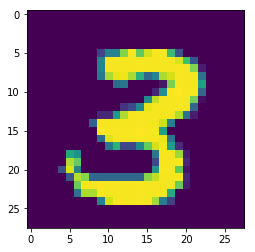

In [0]:
plt.imshow(trainx[0].reshape(28, 28))

In [0]:
def test_euclidean(trainX, trainY, testX, testY, train_size, test_size):
  trainX = trainX[:train_size, :]
  trainY = trainY[:train_size, :]
  testX = testX[:test_size, :]
  testY = testY[:test_size, :]

  acc = np.zeros((10, 10))

  for i in range(0, test_size):
    distances = euclidean(trainX, testX[i])    
    loc = np.argmin(distances)
    pred = int(trainY[loc, 0])
    actual = int(testY[i, 0])
    acc[actual, pred] += 1
  return acc


def test_cosine(trainX, trainY, testX, testY, train_size, test_size):
  trainX = trainX[:train_size, :]
  trainY = trainY[:train_size, :]
  testX = testX[:test_size, :]
  testY = testY[:test_size, :]

  acc = np.zeros((10, 10))

  for i in range(0, test_size):
    distances = cosine(trainX, testX[i])    
    loc = np.argmax(distances)
    pred = int(trainY[loc, 0])
    actual = int(testY[i, 0])
    acc[actual, pred] += 1
  return acc

In [0]:
def euclidean(train, test):
  return np.sqrt(np.sum(np.square(train - test), axis=1))

def cosine(train, test):
  num = np.sum(train * test, axis=1)
  first = np.sqrt(np.sum(np.square(train), axis=1))
  second = np.sqrt(np.sum(np.square(test), axis=0))
  denom = first * second
  return num / denom

In [0]:
test1 = {}
test_size = 200
fig1_data = np.array([])

for i in range(100, 5100, 100):
  test1[i] = test_euclidean(trainx, trainy, testx, testy, i, test_size)

for k in test1:
  fig1_data = np.append(fig1_data, [k, np.sum(test1[k].diagonal())/test_size])

fig1_data = fig1_data.reshape(int(fig1_data.shape[0]/2), 2)

Text(0, 0.5, 'Accuracy')

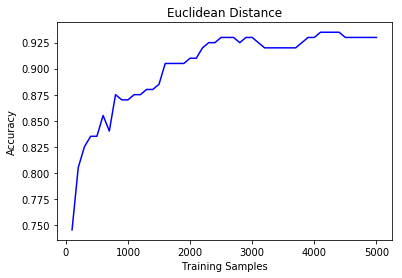

In [0]:
fig, ax = plt.subplots(1,1)
ax.plot(fig1_data[:, 0], fig1_data[:, 1], 'b-')
ax.set_title('Euclidean Distance')
ax.set_xlabel('Training Samples')
ax.set_ylabel('Accuracy')

In [0]:
test2 = {}
test_size2 = 200
fig2_data = np.array([])

for i in range(100, 5100, 100):
  test2[i] = test_cosine(trainx, trainy, testx, testy, i, test_size2)

for k in test2:
  fig2_data = np.append(fig2_data, [k, np.sum(test2[k].diagonal())/test_size2])

fig2_data = fig2_data.reshape(int(fig2_data.shape[0]/2), 2)

Text(0, 0.5, 'Accuracy')

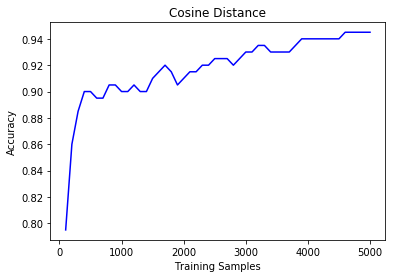

In [0]:
fig, ax = plt.subplots(1,1)
ax.plot(fig2_data[:, 0], fig2_data[:, 1], 'b-')
ax.set_title('Cosine Distance')
ax.set_xlabel('Training Samples')
ax.set_ylabel('Accuracy')

In [0]:
test3 = {}
train_size = 500
fig3_data = np.array([])

for i in range(100, 5100, 100):
  test3[i] = test_euclidean(trainx, trainy, testx, testy, train_size, i)

for k in test3:
  fig3_data = np.append(fig3_data, [k, np.sum(test3[k].diagonal())/k])

fig3_data = fig3_data.reshape(int(fig3_data.shape[0]/2), 2)

Text(0, 0.5, 'Accuracy')

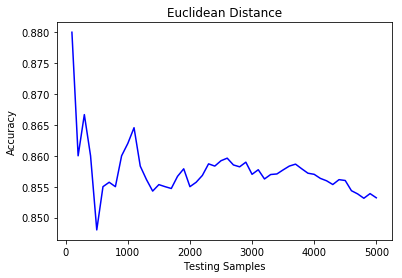

In [0]:
fig, ax = plt.subplots(1,1)
ax.plot(fig3_data[:, 0], fig3_data[:, 1], 'b-')
ax.set_title('Euclidean Distance')
ax.set_xlabel('Testing Samples')
ax.set_ylabel('Accuracy')

In [0]:
test4 = {}
train_size2 = 500
fig4_data = np.array([])

for i in range(100, 5100, 100):
  test4[i] = test_cosine(trainx, trainy, testx, testy, train_size2, i)

for k in test4:
  fig4_data = np.append(fig4_data, [k, np.sum(test4[k].diagonal())/k])

fig4_data = fig4_data.reshape(int(fig4_data.shape[0]/2), 2)

In [0]:
def plot_main(info, title, x_label, y_label):
  fig, ax = plt.subplots(1,1)
  ax.plot(info[:, 0], info[:, 1], 'b-')
  ax.set_title(title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

In [0]:
def plot(conf, title, x_label, y_label):
  plot = np.copy(conf)
  plot_max = np.amax(plot)
  np.fill_diagonal(plot, 0)
  plot = plot / plot_max

  fig, ax1 = plt.subplots()
  pos = ax1.imshow(plot)
  plt.title(title)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  fig.colorbar(pos, ax=ax1)

def plot_hist(conf, title, x_label, y_label):
  plot = np.copy(conf)
  total = np.sum(plot, axis = 0)
  temp = np.copy(plot)
  np.fill_diagonal(temp, 0)
  errors = np.sum(temp, axis=0)

  data = np.array([])
  for i in range(0, 10):
    data = np.append(data, [i, errors[i]/total[i]])
  data = np.reshape(data, (10, 2))

  plt.bar(data[:, 0], data[:, 1], align='center')
  plt.xticks(data[:, 0])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)


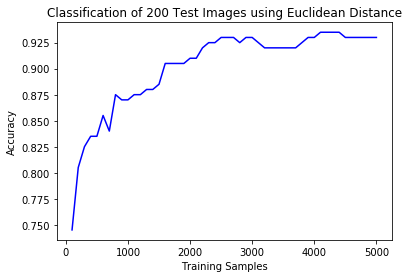

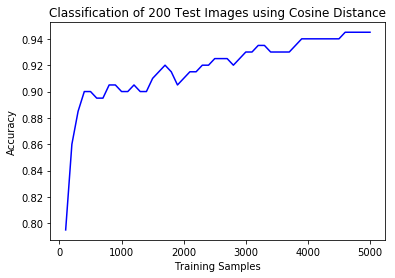

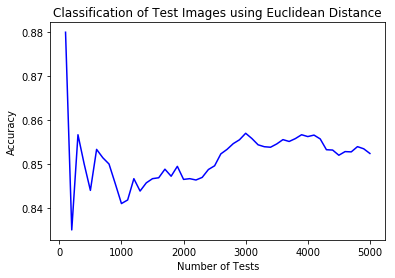

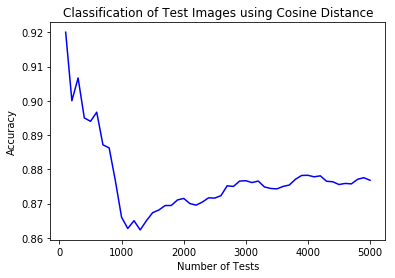

In [0]:
plot_main(fig1_data, 'Classification of 200 Test Images using Euclidean Distance', 'Training Samples', 'Accuracy')
plot_main(fig2_data, 'Classification of 200 Test Images using Cosine Distance', 'Training Samples', 'Accuracy')
plot_main(fig3_data, 'Classification of Test Images using Euclidean Distance', 'Number of Tests', 'Accuracy')
plot_main(fig4_data, 'Classification of Test Images using Cosine Distance', 'Number of Tests', 'Accuracy')

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


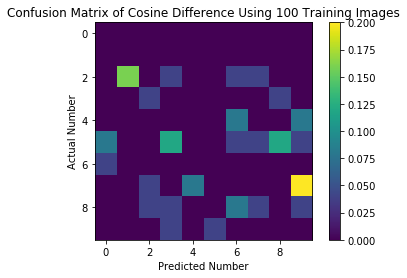

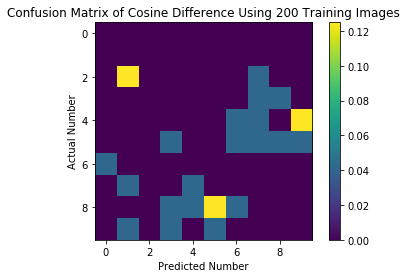

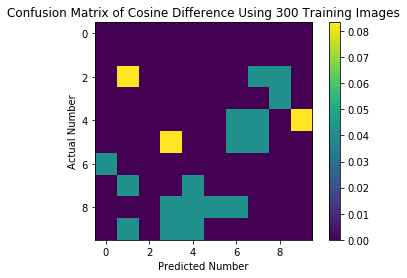

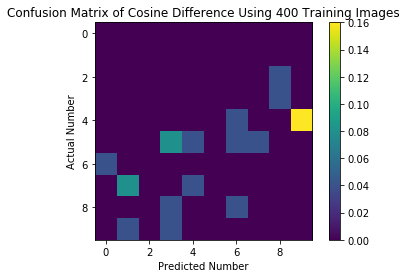

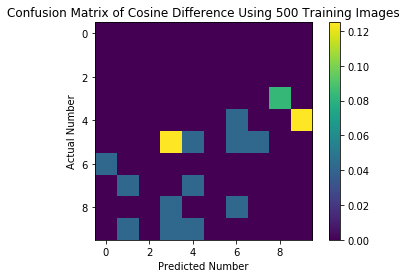

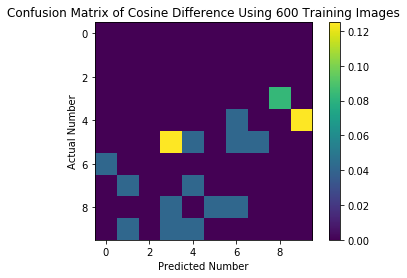

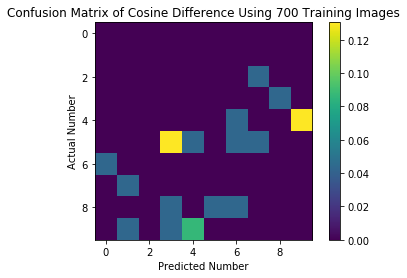

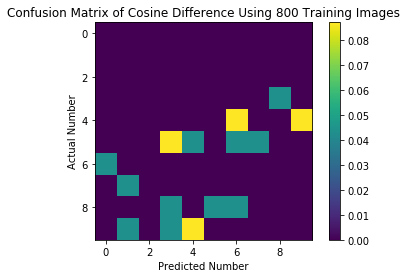

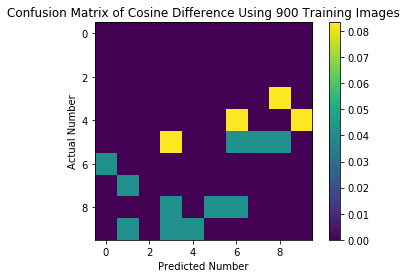

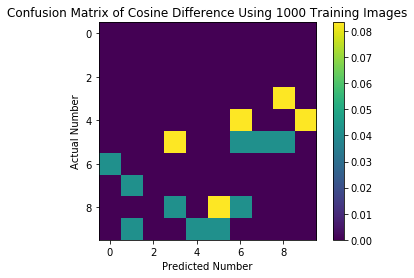

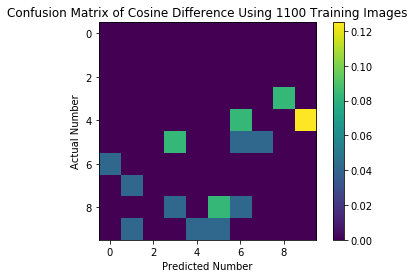

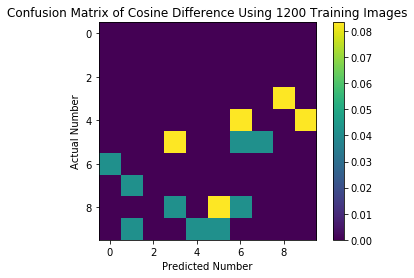

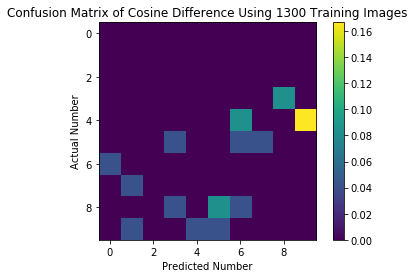

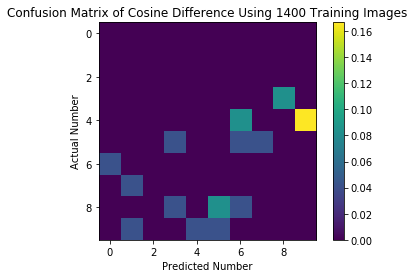

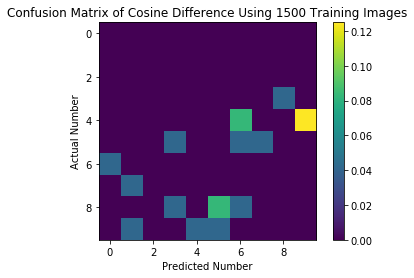

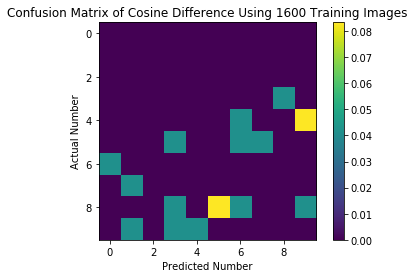

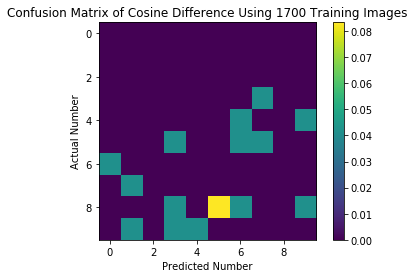

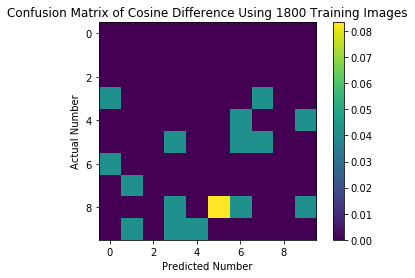

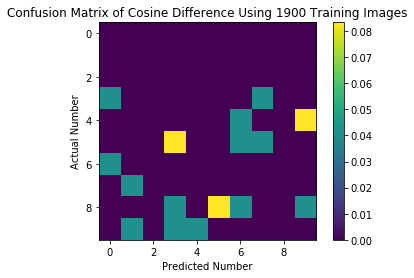

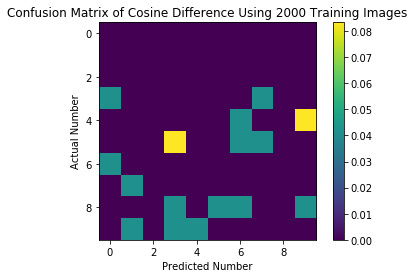

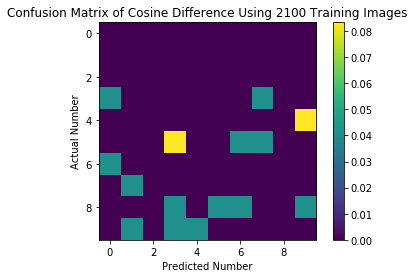

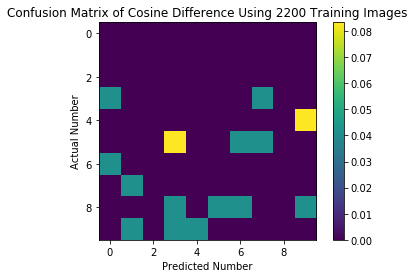

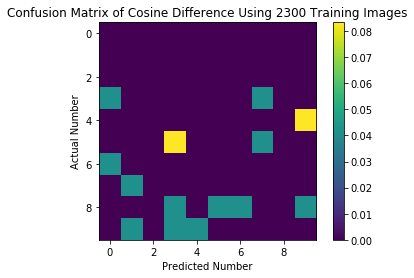

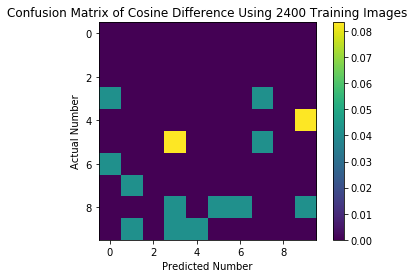

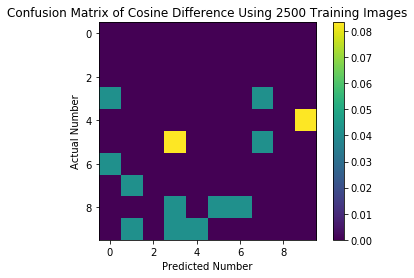

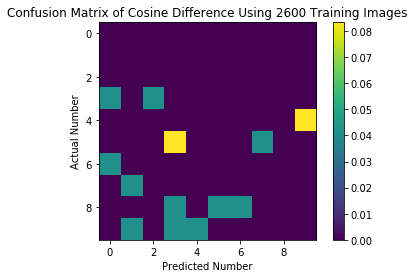

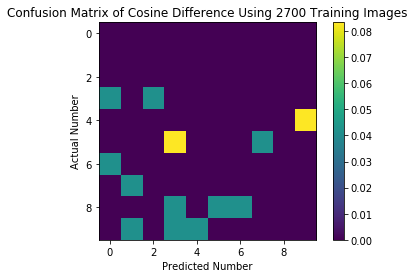

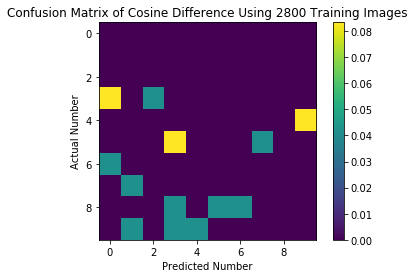

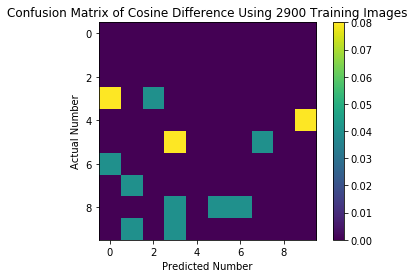

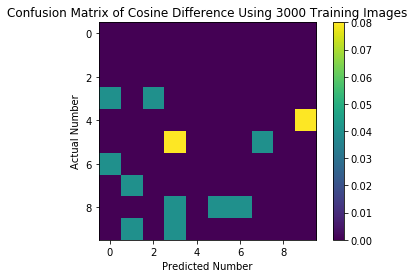

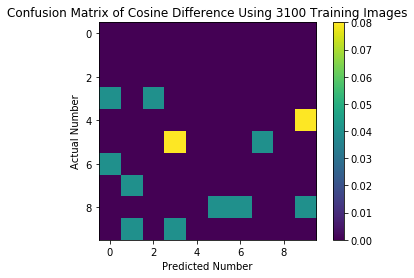

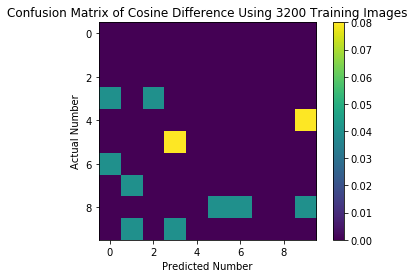

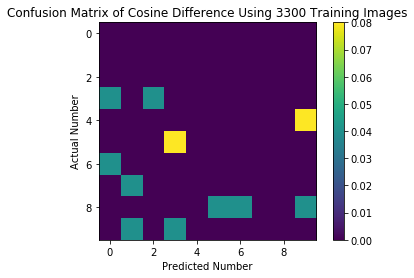

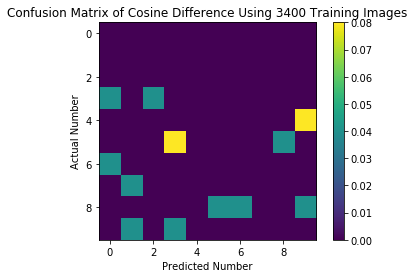

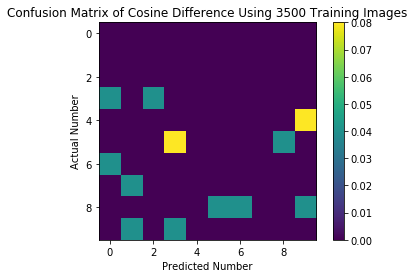

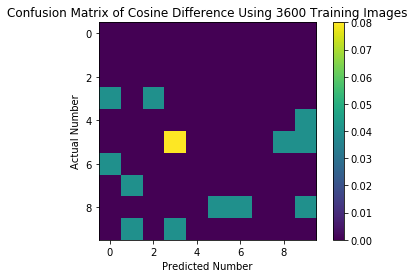

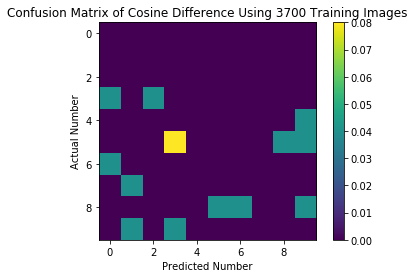

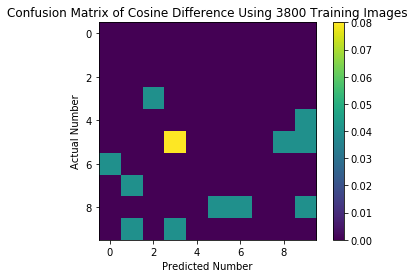

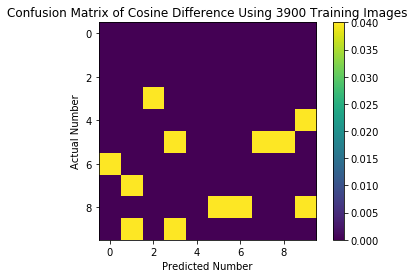

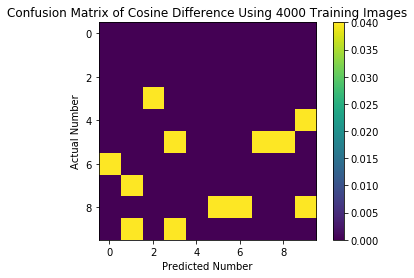

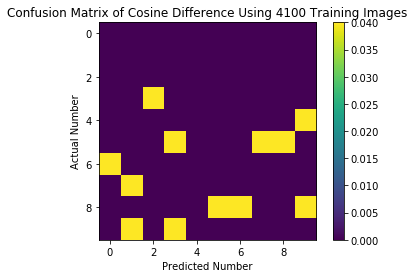

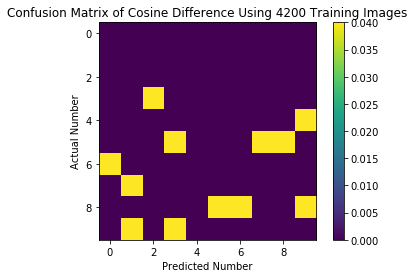

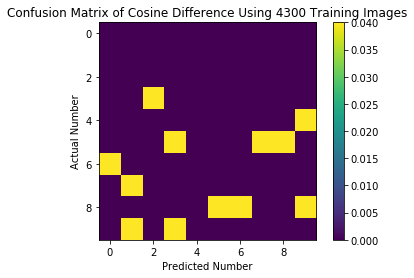

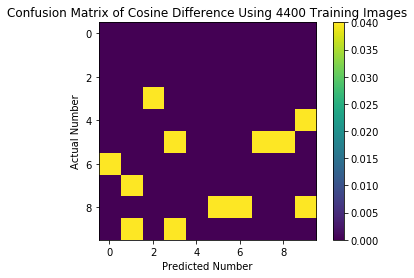

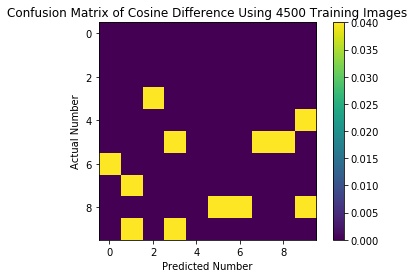

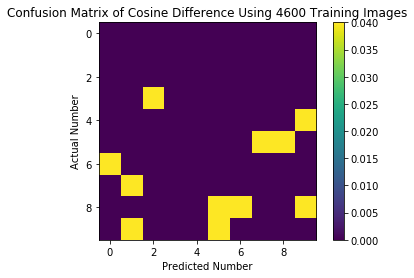

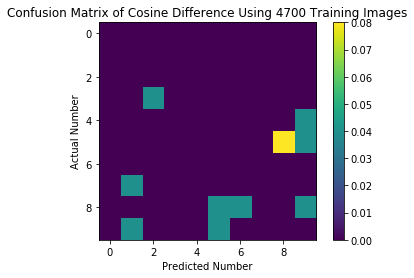

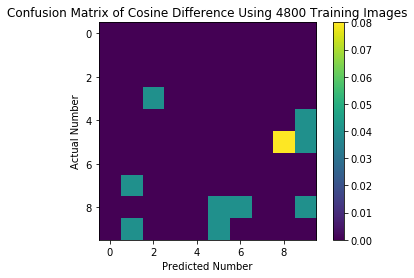

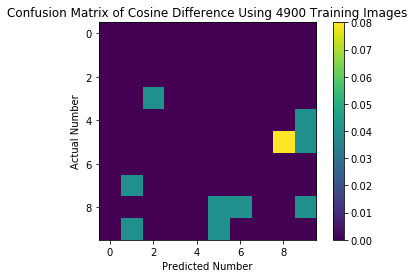

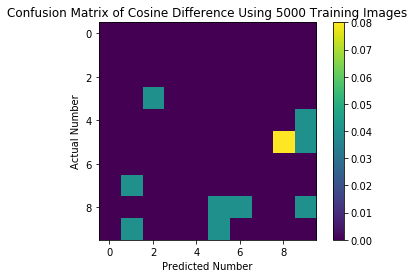

In [40]:
for k in test2:
  plot(test2[k], 'Confusion Matrix of Cosine Difference Using ' + str(k) + ' Training Images', 'Predicted Number', 'Actual Number')

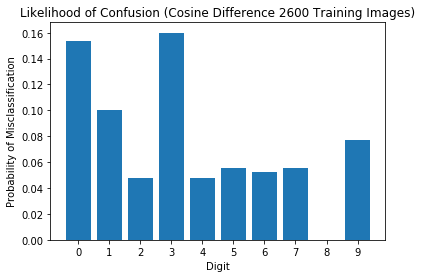

In [51]:
plot_hist(test2[2600], 'Likelihood of Confusion (Cosine Difference 2600 Training Images)', 'Digit', 'Probability of Misclassification')

In [0]:
test1[100]

array([[11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 14.,  1.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1., 15.,  0.,  5.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0., 16.,  0.,  1.,  0.,  0.,  4.],
       [ 1.,  0.,  0.,  5.,  1., 10.,  1.,  2.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  2.,  0.,  0.,  9.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  1.,  0., 15.,  4.],
       [ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0., 23.]])